<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


* Extract information from a given web site 
* Write the scraped data into a csv file.


## Extract information from the given web site
You will extract the data from the below web site: <br> 


In [1]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [2]:
# Your code here
from bs4 import BeautifulSoup
import requests

Download the webpage at the url


In [3]:
#your code goes here
data=requests.get(url).text


Create a soup object


In [4]:
#your code goes here
soup=BeautifulSoup(data, "html.parser")

Scrape the `Language name` and `annual average salary`.


In [5]:
#your code goes here
table=soup.find('table')
for row in table.find_all('tr'):
    cols=row.find_all('td')
    Language_name=cols[1].getText()
    Annual_av_salary=cols[3].getText()
    print(Language_name,",", Annual_av_salary)

Language , Average Annual Salary
Python , $114,383
Java , $101,013
R , $92,037
Javascript , $110,981
Swift , $130,801
C++ , $113,865
C# , $88,726
PHP , $84,727
SQL , $84,793
Go , $94,082


Save the scrapped data into a file named *popular-languages.csv*


In [6]:
# your code goes here
import pandas as pd
table_rows=soup.find_all('tr')
l=[]
for tr in table_rows:
    td=tr.find_all('td')
    row=[tr.text for tr in td]
    l.append(row)

df = pd.DataFrame(l, columns=["No.", "Language", "Created By", "Average Annual Salary", "Learning Difficulty"])

df.drop(["No.", "Created By", "Learning Difficulty"], axis=1, inplace=True)

# Remove extra header rows if any
df = df[df["Language"] != "Language"]

# Save to CSV
df.to_csv("popular-languages.csv", index=False)

# Optional: check result
print(df)
    
    
    # df=pd.DataFrame(l,columns=["No.","Language","Created By","Average Annual Salary","Learning Difficulty"])
# df.drop(["No.","Created By","Learning Difficulty"], axis=1, inplace=True)
# # df.drop(df.index[0], inplace=True)
# df.to_csv('popular-languages.csv')
# df

      Language Average Annual Salary
1       Python              $114,383
2         Java              $101,013
3            R               $92,037
4   Javascript              $110,981
5        Swift              $130,801
6          C++              $113,865
7           C#               $88,726
8          PHP               $84,727
9          SQL               $84,793
10          Go               $94,082


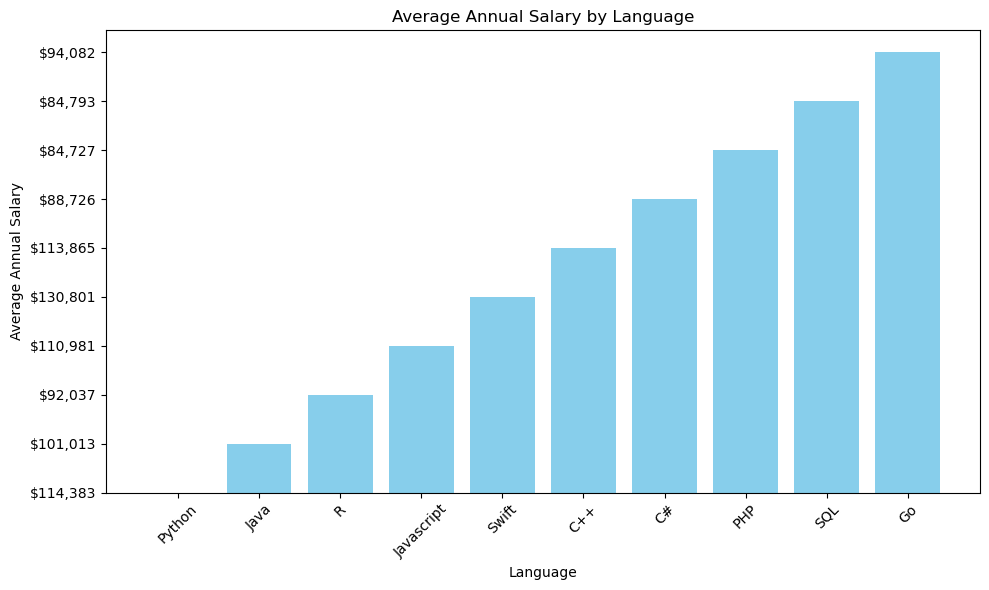

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-10-17  | 0.1  | Ramesh Sannareddy  |  Created initial version of the lab |


 Copyright &copy; 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01).
